In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.fftpack import fft,fftfreq,ifft
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
from matplotlib.pyplot import *

In [2]:
df = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yue_heavy_blink.csv',sep = '\t')
# df1 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yue_heavy_blink.csv',sep = '\t')

In [3]:
ls_1= []
for i in range(0,len(df)):
    data= df['data'][i].split(',')
    lst = data[1:79]
    ls_1 += map(float,lst)
arr_1 = np.array(ls_1)

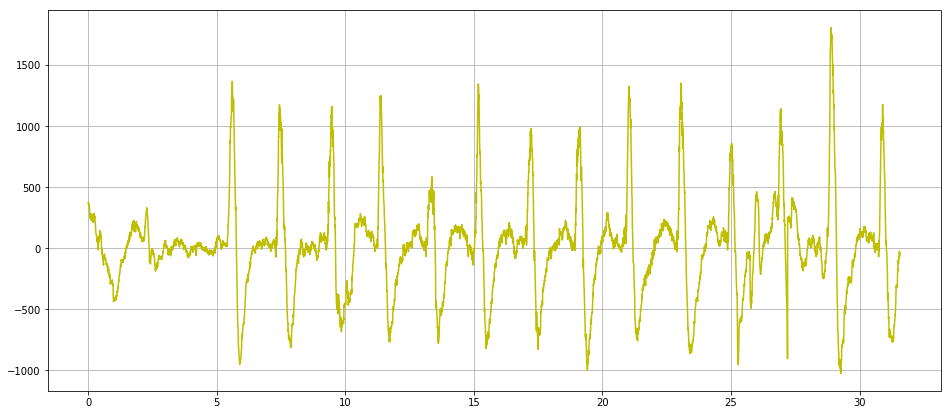

<Figure size 1152x504 with 0 Axes>

In [4]:
fig = plt.figure(figsize = (16,7))
y = arr_1
x = np.linspace(0,len(y)/160.6, len(y))
plt.grid()
plt.plot(x,y,'y-')
fig = plt.figure(figsize = (16,7))

# Peak Detection 1

In [26]:
def _find_peaks(x, eye_blink_period, moving_step):
    blink_times = int(len(x)/eye_blink_period)
    peaks, peaks_out, index = [], [], 1
    for i in range(0, len(x) - moving_step, moving_step):
        eeg_window = x[i:i+moving_step]
        local_peak = np.max(eeg_window)
        local_peak_index = np.where(eeg_window == local_peak)[0][0] + i
        peaks.append([local_peak, local_peak_index])
    peaks = sorted(peaks)
    peaks_out.append(peaks[-1])
    for j in range(len(peaks)-2, 0, -1):
        if_break = False
        if index == blink_times: break
        for peak in peaks_out:
            if abs(peak[1] - peaks[j][1]) < 80:
                if_break = True
                break
        if not if_break:
            peaks_out.append(peaks[j])
            index += 1
    return peaks_out[:14]
_find_peaks(y,320,160)

[[1806.5783182779946, 4638],
 [1366.9004440307617, 899],
 [1352.2717157999673, 3702],
 [1344.0214792887368, 2436],
 [1326.0676066080728, 3378],
 [1249.9993642171223, 1827],
 [1174.0582784016926, 1194],
 [1160.7732772827148, 1522],
 [1143.5222625732422, 4325],
 [1022.6933161417643, 4957],
 [994.1616058349609, 3070],
 [980.9109369913737, 2765],
 [857.7130635579426, 4019],
 [585.5493545532227, 2146]]

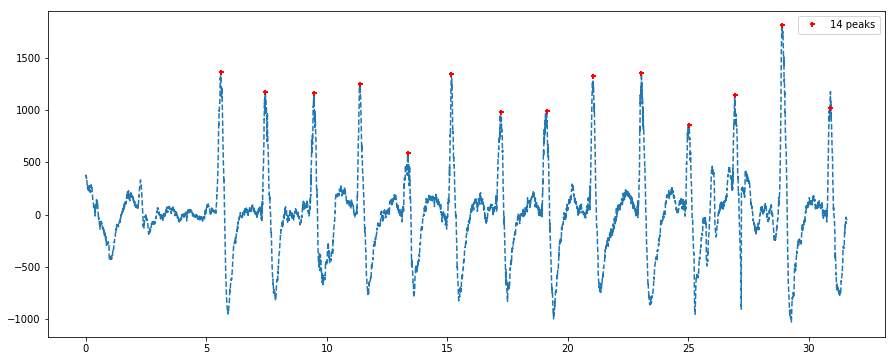

In [27]:
n = np.array(_find_peaks(y,320,160))
n[:,1]
n1 = n[:,1].astype(np.int64)
pyplot.figure(figsize=(15,6))
pplot(x, y, n1)

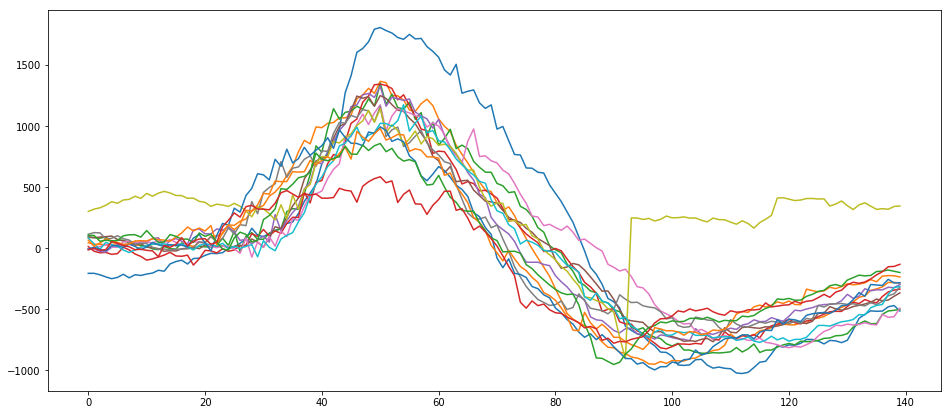

In [28]:
fig= plt.figure(figsize=(16,7))
all_eye_blink_wave = np.zeros([len(n1),140])
for i in range(0,len(n1)):
    all_eye_blink_wave[i] = y[int(n1[i]-0.25*200):int(n1[i]+0.25*360)]
for j in range(0,len(all_eye_blink_wave)):
        plt.plot(all_eye_blink_wave[j])
wave_fin =np.array(all_eye_blink_wave)
np.set_printoptions(threshold=np.nan)
# all_eye_blink_wave

In [29]:
# max_find = np.zeros([len(y)/320,320])
# for i in range(0,14):
#     max_find[i] = y[(2*i+1)*160:(2*i+3)*160]
# for j in range(0,len(max_find)):
#     plt.plot(max_find[j])

# Peak Detection 2

In [30]:
# y = arr_1
# x = np.linspace(0,len(y)/160.6,len(y))
# indexes = peakutils.indexes(y,thres=0.7, min_dist=160)
# print 'Peaks','\n\n', indexes,'\n\n',' X value :', '\n\n',x[indexes],'\n\n','Y value :', '\n\n', y[indexes]
# pyplot.figure(figsize=(15,6))
# pplot(x, y, indexes)
# plt.grid()
# pyplot.title('Find all peaks')
# print(indexes)

In [31]:
# fig= plt.figure(figsize=(16,7))
# all_eye_blink_wave = np.empty([len(indexes),80])
# for i in range(0,len(indexes)):
#     all_eye_blink_wave[i] = y[int(indexes[i]-0.25*160):int(indexes[i]+0.25*160)]
# for j in range(0,len(all_eye_blink_wave)):
#         plt.plot(all_eye_blink_wave[j])

array([  48.67156347,   42.54007339,   33.43811489,   38.30723535,
         42.35753559,   42.33342125,   46.27709162,   42.53328414,
         39.27294413,   35.05949747,   39.56747055,   37.9892758 ,
         33.62973531,   34.01511056,   46.58585503,   46.71723502,
         54.95934259,   44.59169933,   52.10018158,   74.78895642,
         70.56374777,   70.34254074,   62.9752477 ,   94.41782179,
        106.64015725,  130.42761031,  122.63972419,  165.21487917,
        187.53762472,  192.23558335,  231.22916903,  241.85650689,
        290.99668775,  335.99074682,  365.92917215,  418.54059129,
        442.09291821,  539.86204238,  581.6210338 ,  669.2467417 ,
        696.24065218,  756.05748949,  817.74323327,  872.32841764,
        937.24763961,  973.10029893, 1036.46787008, 1069.6192696 ,
       1095.90898241, 1097.94092178, 1168.94435883, 1075.92242105,
       1085.98829451, 1056.39945893, 1041.86791465, 1008.12519164,
        977.9576347 ,  952.3132415 ,  892.7422251 ,  875.00406

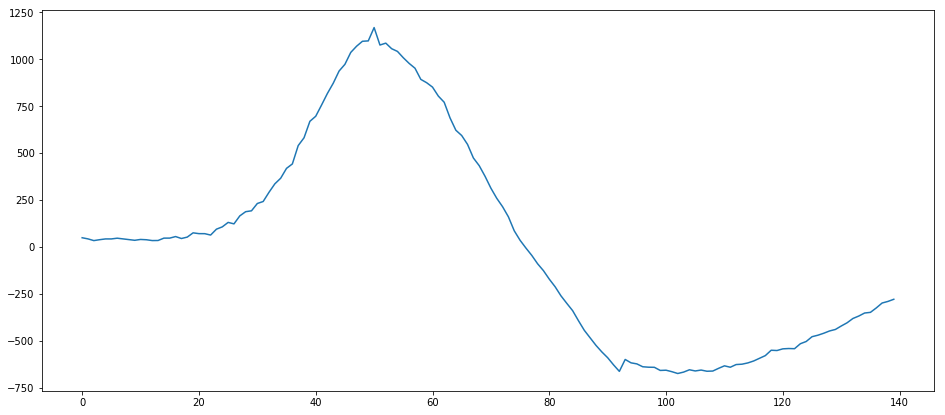

In [32]:
c_lst1 =[]
fig = plt.figure(figsize = (16,7))
mean_eye_blink_wave = all_eye_blink_wave.mean(axis=0)
plt.plot(mean_eye_blink_wave)
mean_eye_blink_wave

In [33]:
from math import sqrt
#def pearson(T2): 
train_data = mean_eye_blink_wave

r1 = []
# r1 = np.zeros((len(all_eye_blink_wave)))

for i in range(0,len(all_eye_blink_wave)):

    real_time_data = all_eye_blink_wave[i]

    sum_train = sum(train_data)

    sum_real_time = sum(real_time_data)

    count = len(train_data)

    sqSum_train = sum(pow(num,2) for num in train_data)

    sqSum_real_time = sum(pow(num,2) for num in real_time_data)

    mulSum = sum(train_data[i]*real_time_data[i] for i in range(count))

    mot = sqrt( (sqSum_train-pow(sum_train,2)/count)*(sqSum_real_time-pow(sum_real_time,2)/count))

    son = mulSum-sum_train*sum_real_time/count

    r = son/mot
    
    r1.append(r)

mean_r = np.sum(r1)/len(r1)

sample_size = 100
    
mm = []

for i in range(sample_size):
    
    mm.append(np.mean(np.random.choice(r1, size=4)))

std = np.std(mm)

mean = np.mean(mm)

final_r = mean-1.23*std

In [34]:
final_r

0.9070375187933971

In [35]:
mean

0.9434678347294658

In [36]:
std

0.02961814303745422